# Convolution Filtering

In [1]:
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import os
from matplotlib import pyplot as plt
%matplotlib inline

*useful functions*

In [2]:

def resize(img, scale): # resize image to scale value param
    return cv2.resize(img, (int(img.shape[1] * scale), int(img.shape[0] * scale) ) )


def scaled(img, scale): # returns new scale value
    img_shape_x, img_shape_y, channels = img.shape
    if img_shape_x > scale:
        return scale / img_shape_x
    else:
        return 1
    

def preprocess(image, lower_upper_list): # 2nd param now takes a list to handle python3
    lower = np.array(lower_upper_list[0], dtype="uint8")
    upper = np.array(lower_upper_list[1], dtype="uint8")
    
    mask = cv2.inRange(image, lower, upper)
    output = cv2.bitwise_and(image, image, mask = mask)
    
    return output, mask


*sample images path*

In [38]:
img1_path = "../images/_tmp/school_pool_66_15.jpg" # gate detection was easier - all 3 bars
img2_path = "../images/_tmp/school_pool_66_75.jpg" # had to get a little creative to find this

*import images*

In [39]:
img1 = cv2.imread(img1_path )
img2 = cv2.imread(img2_path)

print(img1.shape)
print(img2.shape)

(480, 744, 3)
(480, 744, 3)


*show images*

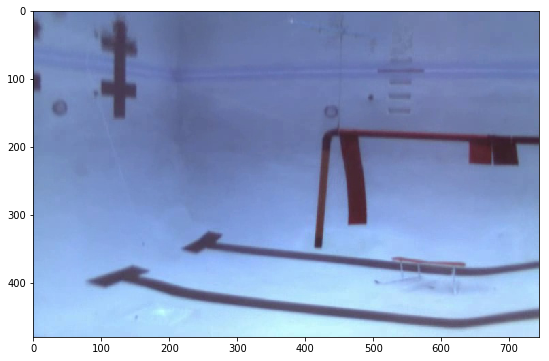

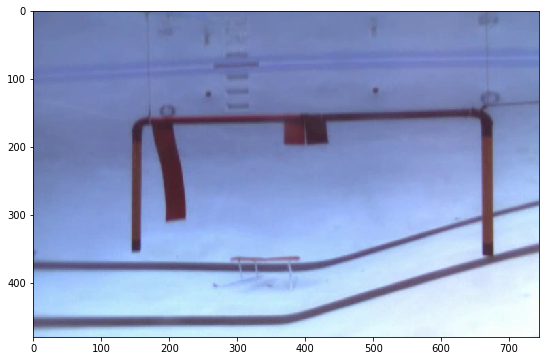

In [44]:
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) )
plt.show()

plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB) )
plt.show()

## Filters - *different sizes*

cv2.flip()

https://docs.opencv.org/3.4.1/d2/de8/group__core__array.html#gaca7be533e3dac7feb70fc60635adf441

*basic kernel*

In [103]:
# kernel_1 = np.ones((3, 3), np.float32)
#kernel_1 = np.ones((3, 3), np.float32) / 9
kernel_1 = np.ones((5, 5), np.float32) / 25

#kernel_1 = cv2.flip(kernel_1, -1)

*basic __vertical__ and __horizontal__ filters

In [104]:
# 3x3

vert = [
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
]

horiz = [
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]
]

# kernel_vert = np.array(vert)
# kernel_horiz = np.array(horiz)
kernel_vert = np.array(vert)/9
kernel_horiz = np.array(horiz)/9

# kernel_vert = cv2.flip(kernel_vert)
# kernel_horiz = cv2.flip(kernel_horiz)

In [132]:
# 5x5 normal

vert = [
    [1, 1, 0, -1, -1],
    [1, 1, 0, -1, -1],
    [1, 1, 0, -1, -1],
    [1, 1, 0, -1, -1],
    [1, 1, 0, -1, -1]
]

horiz = [
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0],
    [-1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1]
]

# kernel_vert = np.array(vert)
# kernel_horiz = np.array(horiz)
kernel_vert = np.array(vert)/25
kernel_horiz = np.array(horiz)/25

# kernel_vert = cv2.flip(kernel_vert)
# kernel_horiz = cv2.flip(kernel_horiz)

In [192]:
# 5x5 thicc

vert = [
    [1, 0, 0, 0, -1],
    [1, 0, 0, 0, -1],
    [1, 0, 0, 0, -1],
    [1, 0, 0, 0, -1],
    [1, 0, 0, 0, -1]
]

horiz = [
    [1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [-1, -1, -1, -1, -1]
]

kernel_vert = np.array(vert)
kernel_horiz = np.array(horiz)
#kernel_vert = np.array(vert)/25
#kernel_horiz = np.array(horiz)/25

# kernel_vert = cv2.flip(kernel_vert)
# kernel_horiz = cv2.flip(kernel_horiz)

*sorbel filters*

In [105]:
# 3x3

sorbel_x = [
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
]

sorbel_y = [
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]
]

# kernel_sorbel_x = np.array(sorbel_x)
# kernel_sorbel_y = np.array(sorbel_y)
kernel_sorbel_x = np.array(sorbel_x)/9
kernel_sorbel_y = np.array(sorbel_y)/9

# kernel_sorbel_x = cv2.flip(kernel_sorbel_x)
# kernel_sorbel_y = cv2.flip(kernel_sorbel_y)

*diagonal filters*

In [176]:
# 3x3

diag_pos = [
    [0, 1, 0],
    [1, 0, -1],
    [0, -1, 0]
]

diag_neg = [
    [0, 1, 0],
    [-1, 0, 1],
    [0, -1, 0]
]

kernel_diag_pos = np.array(diag_pos)
kernel_diag_neg = np.array(diag_neg)
#kernel_diag_pos = np.array(diag_pos)/9
#kernel_diag_neg = np.array(diag_neg)/9

# kernel_diag_pos = cv2.flip(kernel_diag_pos)
# kernel_diag_neg = cv2.flip(kernel_diag_neg)

In [218]:
# 5x5

diag_pos = [
    [0, 1, 1, 1, 0],
    [1, 0, 1, 0, -1],
    [1, 1, 0, -1, -1],
    [1, 0, -1, 0, -1],
    [0, -1, -1, -1, 0]
]

diag_neg = [
    [0, 1, 1, 1, 0],
    [-1, 0, 1, 0, 1],
    [-1, -1, 0, 1, 1],
    [-1, 0, -1, 0, 1],
    [0, -1, -1, -1, 0]
]

kernel_diag_pos = np.array(diag_pos)
kernel_diag_neg = np.array(diag_neg) # best
#kernel_diag_pos = np.array(diag_pos)/25
#kernel_diag_neg = np.array(diag_neg)/25

# kernel_diag_pos = cv2.flip(kernel_diag_pos)
# kernel_diag_neg = cv2.flip(kernel_diag_neg)

## Convolution

cv2.filter2D()

https://docs.opencv.org/3.4.1/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04

### IMAGE 1

basic kernel


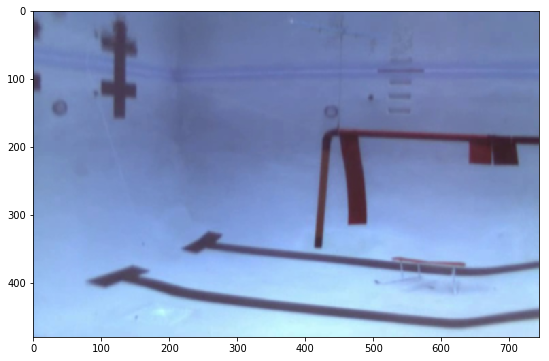

In [134]:
# basic filter
print("basic kernel")
dst1_b = cv2.filter2D(img1, -1, kernel_1)
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(dst1_b, cv2.COLOR_BGR2RGB) )
plt.show()

vertical convolution


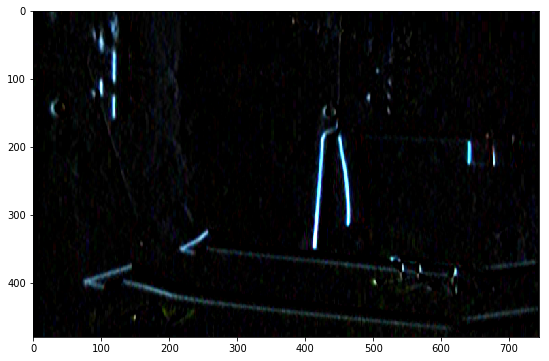

horizontal convolution


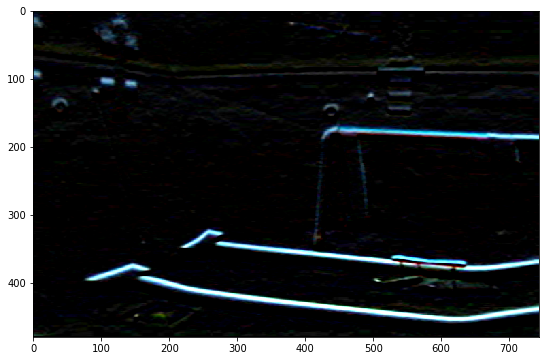

In [217]:
# vertical
print("vertical convolution")

dst1_v = cv2.filter2D(img1, -1, kernel_vert)
#dst1_v = cv2.filter2D(dst1_h, -1, kernel_vert)
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(dst1_v, cv2.COLOR_BGR2RGB) )
plt.show()

print("horizontal convolution")
dst1_h = cv2.filter2D(img1, -1, kernel_horiz)
#dst1_h = cv2.filter2D(dst1_v, -1, kernel_horiz)
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(dst1_h, cv2.COLOR_BGR2RGB) )
plt.show()

sorbel X convolution


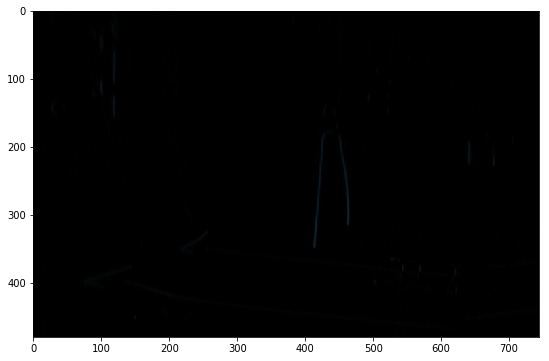

sorbel Y convolution


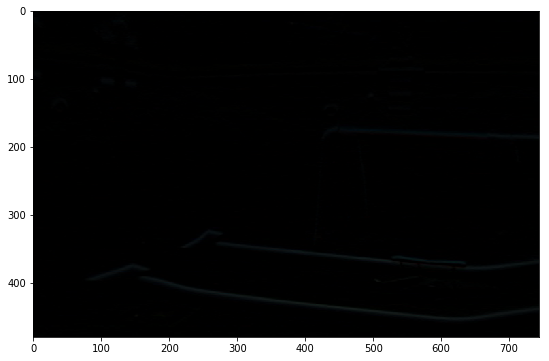

In [223]:
print("sorbel X convolution")
dst1_sx = cv2.filter2D(img1, -1, kernel_sorbel_x)
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(dst1_sx, cv2.COLOR_BGR2RGB) )
plt.show()

print("sorbel Y convolution")
dst1_sy = cv2.filter2D(img1, -1, kernel_sorbel_y)
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(dst1_sy, cv2.COLOR_BGR2RGB) )
plt.show()

positive diagonal convolution


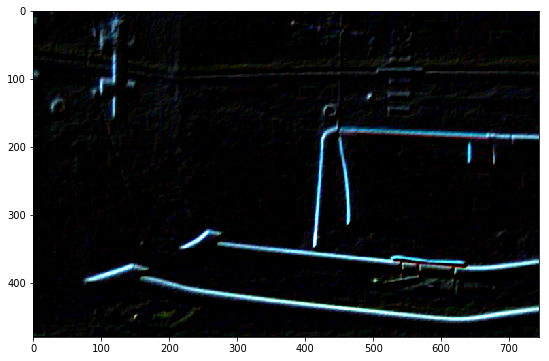

negative diagonal convolution


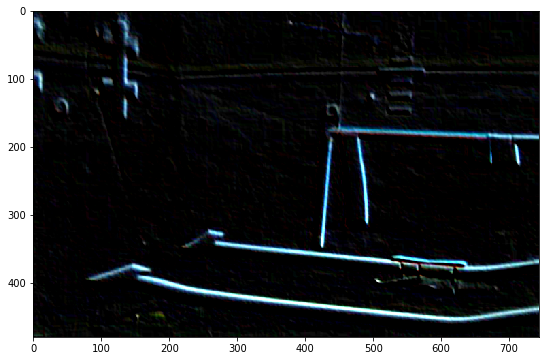

In [219]:
print("positive diagonal convolution")
dst1_dp = cv2.filter2D(img1, -1, kernel_diag_pos)
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(dst1_dp, cv2.COLOR_BGR2RGB) )
plt.show()

print("negative diagonal convolution")
dst1_dn = cv2.filter2D(img1, -1, kernel_diag_neg)
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(dst1_dn, cv2.COLOR_BGR2RGB) )
plt.show()

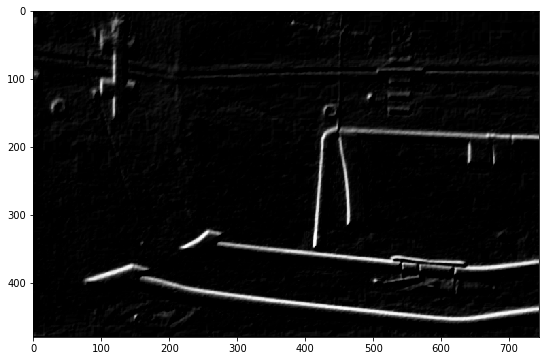

In [222]:
#img1_gray = cv2.cvtColor(dst1_b, cv2.COLOR_BGR2GRAY)
#img1_gray = cv2.cvtColor(dst1_v, cv2.COLOR_BGR2GRAY)
#img1_gray = cv2.cvtColor(dst1_h, cv2.COLOR_BGR2GRAY)
img1_gray = cv2.cvtColor(dst1_sx, cv2.COLOR_BGR2GRAY)
#img1_gray = cv2.cvtColor(dst1_sy, cv2.COLOR_BGR2GRAY)
#img1_gray = cv2.cvtColor(dst1_dp, cv2.COLOR_BGR2GRAY)
#img1_gray = cv2.cvtColor(dst1_dn, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 6) )
plt.imshow(img1_gray, cmap='gray')
plt.show()

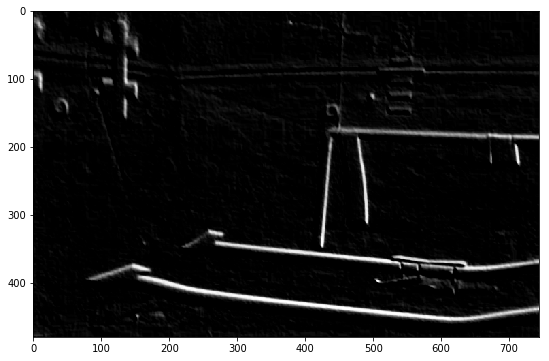

In [221]:
plt.figure(figsize=(10, 6) )
plt.imshow(img1_gray, cmap='gray')
plt.show()

### IMAGE 2

basic kernel


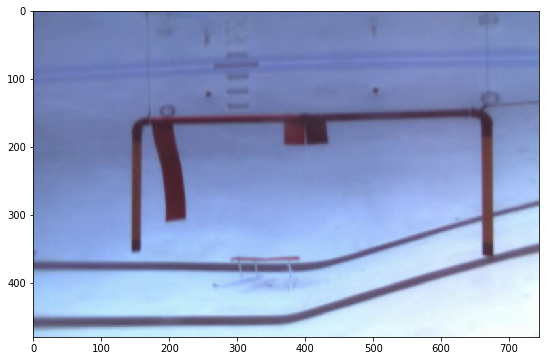

In [115]:
# basic filter
print("basic kernel")
dst2_b = cv2.filter2D(img2, -1, kernel_1)
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(dst2_b, cv2.COLOR_BGR2RGB) )
plt.show()

vertical convolution


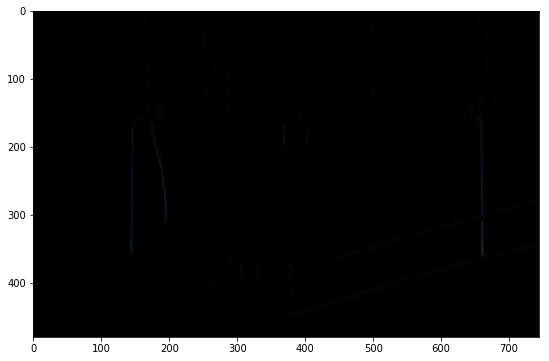

horizontal convolution


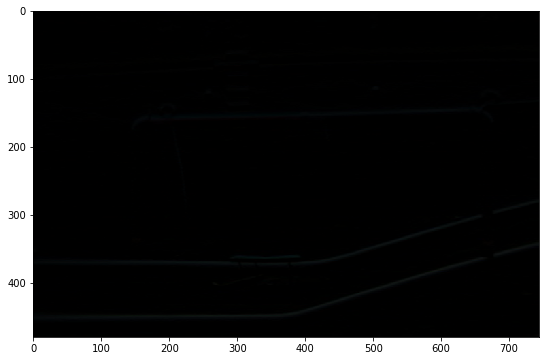

In [116]:
# vertical
print("vertical convolution")
dst2_v = cv2.filter2D(img2, -1, kernel_vert)
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(dst2_v, cv2.COLOR_BGR2RGB) )
plt.show()

print("horizontal convolution")
dst2_h = cv2.filter2D(img2, -1, kernel_horiz)
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(dst2_h, cv2.COLOR_BGR2RGB) )
plt.show()

sorbel X convolution


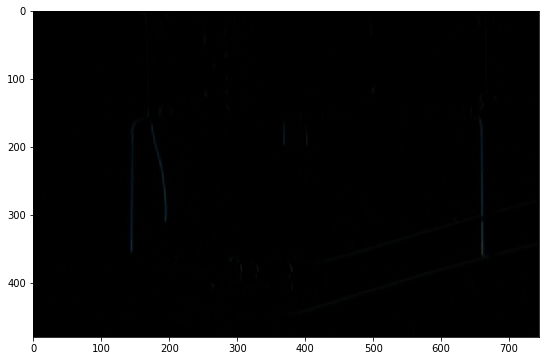

sorbel Y convolution


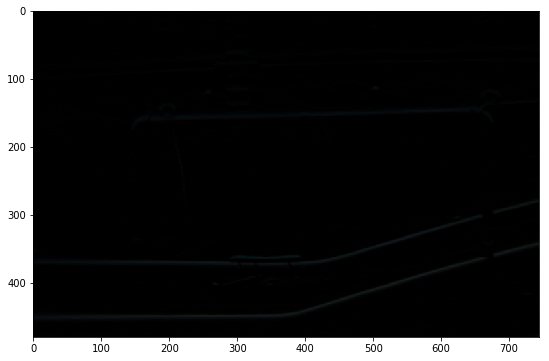

In [225]:
print("sorbel X convolution")
dst2_sx = cv2.filter2D(img2, -1, kernel_sorbel_x)
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(dst2_sx, cv2.COLOR_BGR2RGB) )
plt.show()

print("sorbel Y convolution")
dst2_sy = cv2.filter2D(img2, -1, kernel_sorbel_y)
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(dst2_sy, cv2.COLOR_BGR2RGB) )
plt.show()

positive diagonal convolution


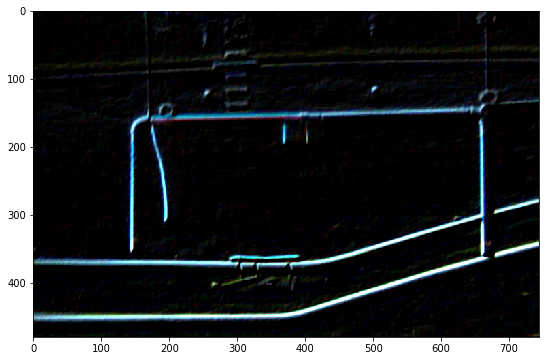

negative diagonal convolution


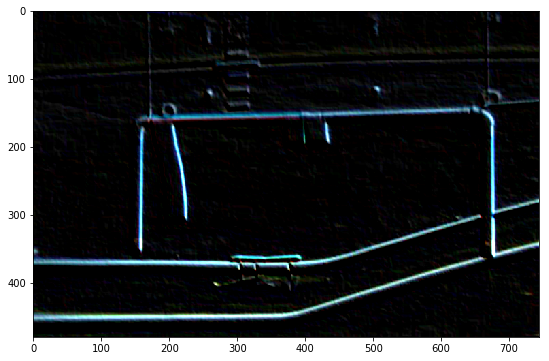

In [164]:
print("positive diagonal convolution")
dst2_dp = cv2.filter2D(img2, -1, kernel_diag_pos)
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(dst2_dp, cv2.COLOR_BGR2RGB) )
plt.show()

print("negative diagonal convolution")
dst2_dn = cv2.filter2D(img2, -1, kernel_diag_neg)
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(dst2_dn, cv2.COLOR_BGR2RGB) )
plt.show()

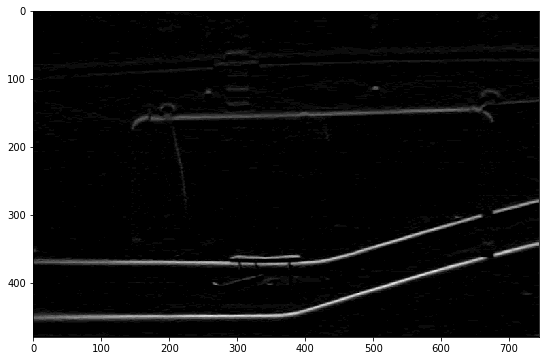

In [230]:
#img2_gray = cv2.cvtColor(dst2_b, cv2.COLOR_BGR2GRAY)
#img2_gray = cv2.cvtColor(dst2_v, cv2.COLOR_BGR2GRAY)
#img2_gray = cv2.cvtColor(dst2_h, cv2.COLOR_BGR2GRAY)
#img2_gray = cv2.cvtColor(dst2_sx, cv2.COLOR_BGR2GRAY)
#img2_gray = cv2.cvtColor(dst2_sy, cv2.COLOR_BGR2GRAY)
#img2_gray = cv2.cvtColor(dst2_dp, cv2.COLOR_BGR2GRAY)
#img2_gray = cv2.cvtColor(dst2_dn, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 6) )
plt.imshow(img2_gray, cmap='gray')
plt.show()

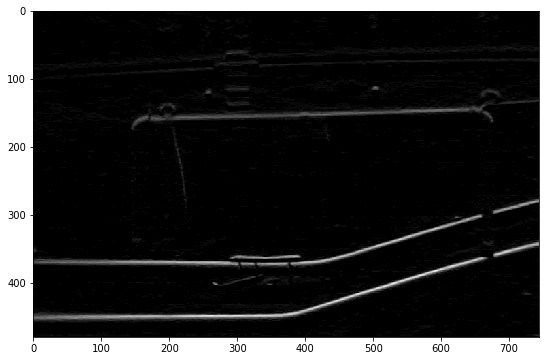

In [228]:
plt.figure(figsize=(10, 6) )
plt.imshow(img2_gray, cmap='gray')
plt.show()